In [1]:
#%matplotlib notebook
%matplotlib inline

import os.path
import numpy as np
import scipy.linalg as la
from numpy import *
from os import path
home = path.expanduser("~")
desktop = path.join(home, "Desktop")
working_path = "MUSIC/"

from matplotlib import animation
import matplotlib.pyplot as plt
#plt.style.use('CS_paper')
import matplotlib as mpl

In [2]:
# define the contour levels
temperature_levels = linspace(0.13, 0.45, 50)

# define a custmized color map
colors1 = array([[1, 1, 1, 1]])
colors2 = plt.cm.jet(linspace(0., 1, 10))
colors = vstack((colors1, colors2))
my_cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [3]:
def get_medium_at_tau(itau_, data_):
    ed = zeros([neta, nx, ny])
    T  = zeros([neta, nx, ny])
    cs2 = zeros([neta, nx, ny])
    vx = zeros([neta, nx, ny])
    vy = zeros([neta, nx, ny])
    pixx = zeros([neta, nx, ny])
    pixy = zeros([neta, nx, ny])
    pixz = zeros([neta, nx, ny])
    piyy = zeros([neta, nx, ny])
    piyz = zeros([neta, nx, ny])
    bulkpi = zeros([neta, nx, ny])
    
    idx = (abs(data_[:, 0] - itau_) < 0.1)
    data_cut = data_[idx, :]
    for igrid in range(len(data_cut[:, 0])):
        x_idx   = int(data_cut[igrid, 1] + 0.1)
        y_idx   = int(data_cut[igrid, 2] + 0.1)
        eta_idx = int(data_cut[igrid, 3] + 0.1)
        u0 = sqrt(1. + data_cut[igrid, 8]**2.
                  + data_cut[igrid, 9]**2. + data_cut[igrid, 10]**2)
        ed[eta_idx, x_idx, y_idx] = data_cut[igrid, 4]
        T[eta_idx, x_idx, y_idx]  = data_cut[igrid, 6]
        cs2[eta_idx, x_idx, y_idx] = data_cut[igrid, 7]
        vx[eta_idx, x_idx, y_idx] = data_cut[igrid, 8]/u0
        vy[eta_idx, x_idx, y_idx] = data_cut[igrid, 9]/u0
        pixx[eta_idx, x_idx, y_idx] = data_cut[igrid, 11]
        pixy[eta_idx, x_idx, y_idx] = data_cut[igrid, 12]
        pixz[eta_idx, x_idx, y_idx] = data_cut[igrid, 13]
        piyy[eta_idx, x_idx, y_idx] = data_cut[igrid, 14]
        piyz[eta_idx, x_idx, y_idx] = data_cut[igrid, 15]
        bulkpi[eta_idx, x_idx, y_idx] = data_cut[igrid, 16]
    return(ed, T, vx, vy, cs2, pixx, pixy, pixz, piyy, piyz, bulkpi)

def get_eigenvalue(xx,xy,xz,yy,yz):
    zz = - xx - yy
    neta, nx, ny = xx.shape
    Lambda_1 = zeros([neta, nx, ny])
    Lambda_2 = zeros([neta, nx, ny])
    Lambda_3 = zeros([neta, nx, ny])
    for i in range(neta):
        for j in range(nx):
            for k in range(ny):
                pi_tensor = np.array([[xx[i,j,k], xy[i,j,k], xz[i,j,k]],
                                      [xy[i,j,k], yy[i,j,k], yz[i,j,k]],
                                      [xz[i,j,k], yz[i,j,k], zz[i,j,k]]])
                w,v = la.eig(pi_tensor)
                w = np.sort(w)
                Lambda_1[i,j,k] = float(w[0])
                Lambda_2[i,j,k] = float(w[1])
                Lambda_3[i,j,k] = float(w[2])
    return Lambda_1, Lambda_2, Lambda_3

def get_eigenvalue_list(xx, xy, xz, yy, yz):
    zz = - xx - yy
    ncells = len(xx)
    Lambda_1 = zeros(ncells)
    Lambda_2 = zeros(ncells)
    Lambda_3 = zeros(ncells)
    for i in range(ncells):
        pi_tensor = np.array([[xx[i], xy[i], xz[i]],
                              [xy[i], yy[i], yz[i]],
                              [xz[i], yz[i], zz[i]]])
        w,v = la.eig(pi_tensor)
        w = np.sort(w)
        Lambda_1[i] = float(w[0])
        Lambda_2[i] = float(w[1])
        Lambda_3[i] = float(w[2])
    return Lambda_1, Lambda_2, Lambda_3

# change the following line to your results folder

In [9]:
# change the following line to your results folder
#ResultFolder = "IPGlasma_AuAuC30-40_DNMR_14mom_questRevert_H1.0"
#ResultFolder = "IPGlasma_AuAuC30-40_DNMR_14mom_questRevert_P1.0"
#ResultFolder = "IPGlasma_AuAuC30-40_DNMR_ADSCFT_questRevert_H1.0"
#ResultFolder = "IPGlasma_AuAuC30-40_IS_14mom_questRevert_H1.0"
#ResultFolder = "IPGlasma_AuAuC30-40_IS_ADSCFT_questRevert_H1.0"
#ResultFolder = "IPGlasma_AuAuC30-40_IS_14mom_questRevert_P1.0"
#ResultFolder = "IPGlasma_AuAuC30-40_IS_ADSCFT_questRevert_P1.0"
#ResultFolder = "IPGlasma_AuAuC30-40_IS_ADSCFT_questRevert_H1.0"
#ResultFolder = "IPGlasma_AuAuC30-40_IS_ADSCFT_questRevert_H0.6"
#ResultFolder = "IPGlasma_pAuC0-5_DNMR_14mom_questRevert_H1.0"
#ResultFolder = "IPGlasma_pAuC0-5_DNMR_14mom_questRevert_P1.0"
#ResultFolder = "IPGlasma_pAuC0-5_DNMR_ADSCFT_questRevert_H1.0"
#ResultFolder = "IPGlasma_pAuC0-5_DNMR_ADSCFT_questRevert_H0.5"
#ResultFolder = "IPGlasma_pAuC0-5_DNMR_ADSCFT_questRevert_H0.1"
#ResultFolder = "IPGlasma_pAuC0-5_IS_14mom_questRevert_H1.0"
#ResultFolder = "IPGlasma_pAuC0-5_IS_14mom_questRevert_H0.5"
#ResultFolder = "IPGlasma_pAuC0-5_IS_14mom_questRevert_P1.0"
#ResultFolder = "IPGlasma_pAuC0-5_IS_14mom_questRevert_H0.25"
#ResultFolder = "IPGlasma_pAuC0-5_IS_ADSCFT_questRevert_P1.0"
#ResultFolder = "IPGlasma_pAuC0-5_IS_ADSCFT_questRevert_H0.6"
#ResultFolder = "IPGlasma_pAuC0-5_IS_ADSCFT_questRevert_H1.0"
ResultFolder = "evolution_file_pAu_DNMR_Causality_Mod_2.dat"
#ResultFolder = "IPGlasma_OO5020C0-5_IS_ADSCFT_tune3_questRevert_H0.6"
#ResultFolder = "IPGlasma_PbPbC60-70_IS_ADSCFT_questRevert_H0.6"
#ResultFolder = "IPGlasma_pPb5020C0-5_IS_ADSCFT_tune3_questRevert_H0.6"
#ResultFolder = "IPGlasma_pO5020C0-5_IS_ADSCFT_tune3_questRevert_H0.6"

tauPiflag = 0        # 0: 14-mom 1: ADSCFT   
DNMRflag = 1         # 0: IS     1: DNMR

In [10]:
# load hydrodynamic evolution data
data = fromfile(path.join(working_path, ResultFolder), dtype=float32)
# read header about the grid information
header = data[0:16]

# read in data and reshape it to the correct form
data = data[16:].reshape(-1, int(header[-1]))

# get the list for tau frame
tau_list = unique(data[:, 0])
ntau = len(tau_list)
tau0= header[0]; dtau = header[1];
tau_list = array([tau0 + i*dtau for i in range(ntau)])

# define 3D grid in x, y, and eta_s (space-time rapidity)
neta = int(header[8])
eta_size = -2.*header[10]
deta = header[9]
eta = array([-eta_size/2.+i*deta for i in range(neta)])

nx = int(header[2])
x_size = 2.*abs(header[4])
dx = header[3]
x = array([-x_size/2.+i*dx for i in range(nx)])

ny = int(header[5])
y_size = 2.*abs(header[7])
dy = header[6]
y = array([-y_size/2.+i*dy for i in range(ny)])

# print out some useful information about the evolution file
print("Read in data completed.")
print("ntau = {0}, tau_min = {1:.2f} fm, tau_max = {2:.2f} fm, dtau = {3:.3f} fm".format(
                            ntau, tau_list[0], tau_list[-1], dtau))
print("nx = {0}, x_min = {1:.2f} fm, x_max = {2:.2f} fm, dx = {3:.2f} fm".format(
                            nx, x[0], x[-1], dx))
print("ny = {0}, y_min = {1:.2f} fm, y_max = {2:.2f} fm, dy = {3:.2f} fm".format(
                            ny, y[0], y[-1], dy))
print("neta = {0}, eta_min = {1:.2f} fm, eta_max = {2:.2f} fm, deta = {3:.2f}".format(
                            neta, eta[0], eta[-1], deta))

Read in data completed.
ntau = 56, tau_min = 0.40 fm, tau_max = 3.15 fm, dtau = 0.050 fm
nx = 256, x_min = -10.00 fm, x_max = 9.92 fm, dx = 0.08 fm
ny = 256, y_min = -10.00 fm, y_max = 9.92 fm, dy = 0.08 fm
neta = 1, eta_min = 0.00 fm, eta_max = 0.00 fm, deta = 0.10


In [11]:
itau_start = 0
print("tau cut = {} fm/c".format(tau_list[itau_start]))
idx = data[:, 0] > itau_start

tau = tau0 + data[idx, 0]*dtau
Pi = data[idx, 16]
ed = data[idx, 4]
thermalP = data[idx, 5]
cs2 = data[idx, 7]
Lambdas = get_eigenvalue_list(data[idx, 11], data[idx, 12], data[idx, 13],
                              data[idx, 14], data[idx, 15])
L1 = Lambdas[0]
L2 = Lambdas[1]
L3 = Lambdas[2]

C_eta = 5.
deltapipi_pi = 4./3.
deltaPiPi_Pi = 2./3.
zeta_r = 14.55*(1./3.-cs2)**2
if tauPiflag == 1:
    zeta_r = 7./5.*(1./3.-cs2)
    
taupipi_pi = 10./7.*DNMRflag
lambdapiPi_pi = 6./5.*DNMRflag
lambdaPipi_Pi = 8./5.*(1./3.-cs2)*DNMRflag

# define the necessary conditions
n1 = 2./C_eta + lambdapiPi_pi*Pi - 1./2.*taupipi_pi*abs(L1)
n2 = 1. - 1./C_eta + (1. - 1./2.*lambdapiPi_pi)*Pi - 1./4.*taupipi_pi*L3
n3 = 1./C_eta + 1./2.*lambdapiPi_pi*Pi - 1./4.*taupipi_pi*L3

n4_1 = 1. - 1./C_eta + (1. - lambdapiPi_pi/2.)*Pi + (1. - taupipi_pi/4.)*L1 - taupipi_pi/4.*L2
n4_2 = 1. - 1./C_eta + (1. - lambdapiPi_pi/2.)*Pi + (1. - taupipi_pi/4.)*L1 - taupipi_pi/4.*L3
n4_3 = 1. - 1./C_eta + (1. - lambdapiPi_pi/2.)*Pi + (1. - taupipi_pi/4.)*L2 - taupipi_pi/4.*L1
n4_4 = 1. - 1./C_eta + (1. - lambdapiPi_pi/2.)*Pi + (1. - taupipi_pi/4.)*L2 - taupipi_pi/4.*L3
n4_5 = 1. - 1./C_eta + (1. - lambdapiPi_pi/2.)*Pi + (1. - taupipi_pi/4.)*L3 - taupipi_pi/4.*L1
n4_6 = 1. - 1./C_eta + (1. - lambdapiPi_pi/2.)*Pi + (1. - taupipi_pi/4.)*L3 - taupipi_pi/4.*L2
n4 = concatenate((n4_1, n4_2, n4_3, n4_4, n4_5, n4_6))

n5 = (cs2 + 4./3.*1./C_eta + zeta_r + (2./3.*lambdapiPi_pi + deltaPiPi_Pi + cs2)*Pi
      + (deltapipi_pi + 1./3.*taupipi_pi + lambdaPipi_Pi + cs2)*L1)
n6 = (1. - cs2 - 4./3.*1./C_eta - zeta_r + (1. - 2./3.*lambdapiPi_pi - deltaPiPi_Pi - cs2)*Pi
      + (1. - deltapipi_pi - 1./3.*taupipi_pi - lambdaPipi_Pi - cs2)*L3)

tau cut = 0.4000000059604645 fm/c


/tmp/ipykernel_4025/2393814635.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
  Lambda_1[i] = float(w[0])
/tmp/ipykernel_4025/2393814635.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  Lambda_2[i] = float(w[1])
/tmp/ipykernel_4025/2393814635.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  Lambda_3[i] = float(w[2])


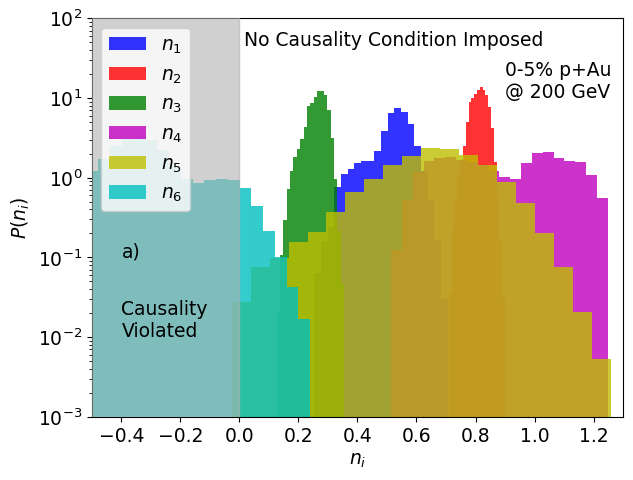

In [8]:
plt.rcParams.update({'font.size': 13.5})

alpha_value = 0.8
plt.figure()
plt.axes([0.12, 0.12, 0.83, 0.83])
plt.hist(n1, 20, color='b', density=True, alpha = alpha_value, label=r'$n_1$')
plt.hist(n2, 20, color='r', density=True, alpha = alpha_value, label=r'$n_2$')
plt.hist(n3, 20, color='g', density=True, alpha = alpha_value, label=r'$n_3$')
plt.hist(n4, 20, color='m', density=True, alpha = alpha_value, label=r'$n_4$')
plt.hist(n5, 20, color='y', density=True, alpha = alpha_value, label=r'$n_5$')
plt.hist(n6, 20, color='c', density=True, alpha = alpha_value, label=r'$n_6$')
plt.fill_between([-1, 0], [1e-5, 1e-5], [1e3, 1e3], color="#B2B2B2", alpha=0.6, zorder=3)
plt.xlim([-0.5, 1.3])
plt.ylim([1e-3, 1e2])
plt.yscale('log')
plt.legend(loc= "upper left")
plt.text(-0.4, 1e-2, "Causality\nViolated")
plt.text(-0.4, 1e-1, "a)")
plt.xlabel(r"$n_i$")
plt.ylabel(r"$P(n_i)$")

plt.text(0.9, 10, "0-5% p+Au\n@ 200 GeV")
#plt.text(0.015, 45, "Necessary Causality Condition Imposed")
plt.text(0.015, 45, "No Causality Condition Imposed")
plt.savefig("pAu_single_event_Mod_0.pdf", format="pdf")

In [12]:
s1 = 1. - 1./C_eta - abs(L1) + (1. - 1./2.*lambdapiPi_pi)*Pi - (1./2.*taupipi_pi)*L3
s2 = 2./C_eta + lambdapiPi_pi*Pi - taupipi_pi*abs(L1)
s3 = ((1. + Pi)*(1. - cs2))-(4./3.*1./C_eta + zeta_r + (2./3.*lambdapiPi_pi + deltaPiPi_Pi)*Pi 
                             + (deltapipi_pi + 1./3.*taupipi_pi + lambdaPipi_Pi + cs2)*L3 + abs(L1) + 
                              ((deltapipi_pi - 1./12.*taupipi_pi)*(lambdaPipi_Pi + cs2 - 1./12.*taupipi_pi)
                             *(L3 + abs(L1))**2)/(1. - 1./C_eta + (1. - 1./2.*lambdapiPi_pi)*Pi - abs(L1) - 1./2.*taupipi_pi*L3))
s4 = 1./3./C_eta + (1./6.*lambdapiPi_pi + deltaPiPi_Pi + cs2)*Pi + (1./6.*taupipi_pi - deltapipi_pi + lambdaPipi_Pi - cs2)*abs(L1) + zeta_r + cs2
s5 = ((1./C_eta + 1./2.*lambdapiPi_pi*Pi - 1./2.*taupipi_pi*abs(L1))**2)-((deltapipi_pi - 1./12.*taupipi_pi)*(lambdaPipi_Pi + cs2 - 1./12.*taupipi_pi)*(L3+abs(L1))**2)
s6 = ((4./3./C_eta + (2./3.*lambdapiPi_pi + deltaPiPi_Pi + cs2)*Pi 
      - (deltapipi_pi + 1./3.*taupipi_pi - lambdaPipi_Pi + cs2)*abs(L1) + zeta_r + cs2)
    -((((1. + Pi + L2)*(1. + Pi + L3))/(3*(1. + Pi - abs(L1))**2))
      *(1. + 1./2./C_eta +(1. + lambdapiPi_pi)*Pi - abs(L1) + taupipi_pi*L3)))

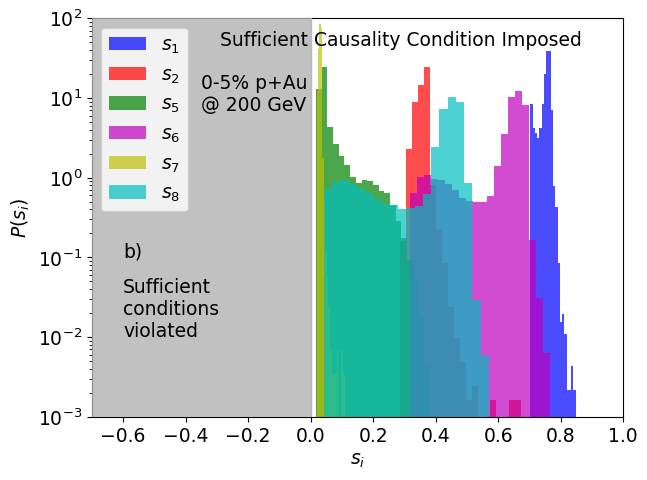

In [14]:
plt.rcParams.update({'font.size': 13.5})
alpha_value = 0.7
plt.figure()
plt.axes([0.12, 0.12, 0.83, 0.83])
plt.fill_between([-1, 0], [1e-5, 1e-5], [1e3, 1e3], color="#B2B2B2", alpha=0.8, zorder=3)
plt.hist(s1, 20, color='b', density=True, alpha = alpha_value, label=r'$s_1$')
plt.hist(s2, 20, color='r', density=True, alpha = alpha_value, label=r'$s_2$')
plt.hist(s3, 20, color='g', density=True, alpha = alpha_value, label=r'$s_5$')
plt.hist(s4, 20, color='m', density=True, alpha = alpha_value, label=r'$s_6$')
plt.hist(s5, 20, color='y', density=True, alpha = alpha_value, label=r'$s_7$')
plt.hist(s6, 20, color='c', density=True, alpha = alpha_value, label=r'$s_8$')
plt.xlim([-0.7, 1.0])
plt.ylim([1e-3, 1e2])
plt.yscale('log')
plt.legend(loc=2)
plt.text(-0.6, 1e-2, "Sufficient\nconditions\nviolated")
plt.xlabel(r"$s_i$")
plt.ylabel(r"$P(s_i)$")
plt.text(-0.6, 1e-1, "b)")
plt.text(-0.35, 7, "0-5% p+Au\n@ 200 GeV")
#plt.text(0.55, 7, "0-5% p+Au\n@ 200 GeV")
plt.text(-0.29, 45, "Sufficient Causality Condition Imposed")
#plt.text(-0.29, 45, "No Causality Condition Imposed")
plt.savefig("pAu_single_event_Mod_2.pdf", format="pdf")

In [52]:
idx1 = (s1 < 0) | (s2 < 0) | (s3 < 0) | (s4 < 0) | (s5 < 0) | (s6 < 0)
idx2 = (n1 < 0) | (n2 < 0) | (n3 < 0) | (n5 < 0) | (n6 < 0)
print(len(s1[idx1])/len(s1))
print(len(s1[idx2])/len(s1))

0.4959839642892683
0.007491861308161437


### Plot the $R_\pi$ and $R_\Pi$ distributions vs. $\tau$

In [53]:
import matplotlib.colors as mcolors
colors = [(1,0,0,c) for c in concatenate((zeros(5), linspace(0,1,100)))]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=20)
colors = [(0,0,1,c) for c in concatenate((zeros(5), linspace(0,1,100)))]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=20)

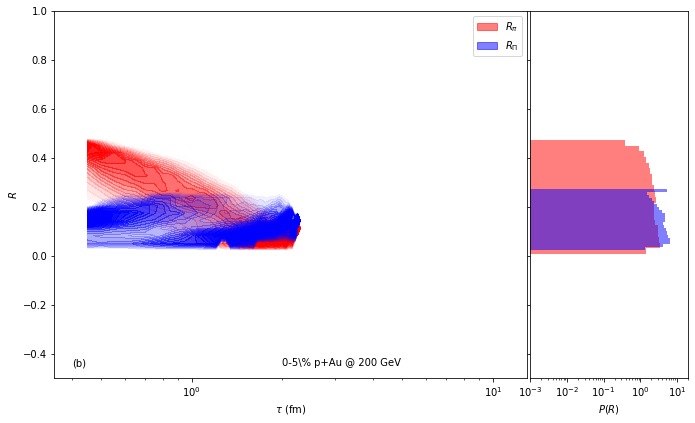

In [17]:
tau_list = unique(tau)
dtau = tau_list[1] - tau_list[0]
rbins = linspace(-0.5, 1.0, 50)
Tau, R = meshgrid(tau_list, rbins)
Rpi_density = zeros(Tau.shape)
RPi_density = zeros(Tau.shape)

R_pi = sqrt(L1**2. + L2**2. + L3**2.)

for itau, tau_val in enumerate(tau_list):
    idx = (tau == tau_val)
    R_pi_hist, hist_x = histogram(R_pi[idx], density=True)
    Rpi_density[:, itau] = interp(rbins, (hist_x[:-1] + hist_x[1:])/2., R_pi_hist, left=0., right=0.)
    R_pi_hist, hist_x = histogram(Pi[idx], density=True)
    RPi_density[:, itau] = interp(rbins, (hist_x[:-1] + hist_x[1:])/2., R_pi_hist, left=0., right=0.)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,6), gridspec_kw={'width_ratios': [3, 1]})
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.98, top=0.98, wspace=0.01, hspace=0.0)
ax[0].contourf(Tau, R, Rpi_density, linspace(0, 8, 20), cmap=cmapred, extend='both')
ax[0].contourf(Tau, R, RPi_density, linspace(0, 8, 20), cmap=cmapblue, extend='both')
ax[0].fill_between([-1, -1], [0., 0.], [0., 0.], color='r', alpha=0.5, label=r"$R_\pi$")
ax[0].fill_between([-1, -1], [0., 0.], [0., 0.], color='b', alpha=0.5, label=r"$R_\Pi$")
ax[0].legend()
ax[0].set_ylim([-0.5, 1.0])
ax[0].set_xlim([0.35, 13])
ax[0].set_xscale("log")
ax[0].set_xlabel(r"$\tau$ (fm)")
ax[0].set_ylabel(r"$R$")

ax[1].hist(R_pi, 20, density=True, orientation='horizontal', color='r', alpha=0.5)
ax[1].hist(Pi, 20, density=True, orientation='horizontal', color='b', alpha=0.5)
ax[1].set_xlim([1e-3, 20])
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$P(R)$")

#ax[0].text(0.4, -0.45, "(a)")
#ax[0].text(2., -0.45, "30-40\% Au+Au @ 200 GeV")
#plt.savefig(path.join(desktop, "IPGAuAuC30-40_InverseReynoldsNumberDis.pdf"))

ax[0].text(0.4, -0.45, "(b)")
ax[0].text(2., -0.45, "0-5\% p+Au @ 200 GeV")
plt.savefig(path.join(desktop, "IPGpAuC0-5_InverseReynoldsNumberDis.pdf"))

# Compare $\pi$ and $\Pi$ with thermal Pressure

0.4468013987452432
0.427800061709349


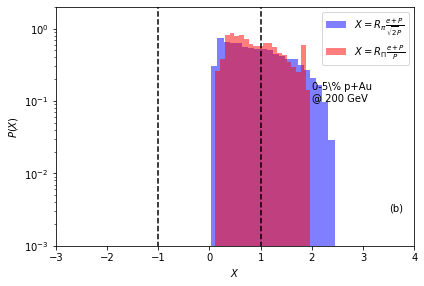

In [18]:
RpivsP = sqrt(L1**2. + L2**2. + L3**2.)*(ed + thermalP)/(sqrt(2)*thermalP)
idx1 = RpivsP > 1.0
print(len(tau[idx1])/len(tau))

RPivsP = Pi*(ed + thermalP)/thermalP
idx1 = abs(RPivsP) > 1.0
print(len(tau[idx1])/len(tau))

plt.figure()
plt.axes([0.12, 0.12, 0.83, 0.83])
plt.hist(RpivsP, 20, color='b', density=True, alpha = 0.5, label=r'$X = R_\pi \frac{e + P}{\sqrt{2} P}$')
plt.hist(RPivsP, 20, color='r', density=True, alpha = 0.5, label=r'$X = R_\Pi \frac{e + P}{P}$')
plt.plot([1, 1], [1e-5, 1e2], '--k')
plt.plot([-1, -1], [1e-5, 1e2], '--k')
plt.legend(loc=0)
plt.xlim([-3, 4])
plt.ylim([1e-3, 2])
plt.yscale('log')
plt.xlabel("$X$")
plt.ylabel("$P(X)$")

#plt.text(3.5, 2e-3, "(a)")
#plt.text(2.0, 0.1, "30-40\% Au+Au\n@ 200 GeV")
#plt.savefig(path.join(desktop, "InverseReyDis_AuAu3040"))

plt.text(3.5, 3e-3, "(b)")
plt.text(2.0, 0.1, "0-5\% p+Au\n@ 200 GeV")
plt.savefig(path.join(desktop, "InverseReyDis_pAuC0-5"))

Text(0, 0.5, '$\\tau$ (fm)')

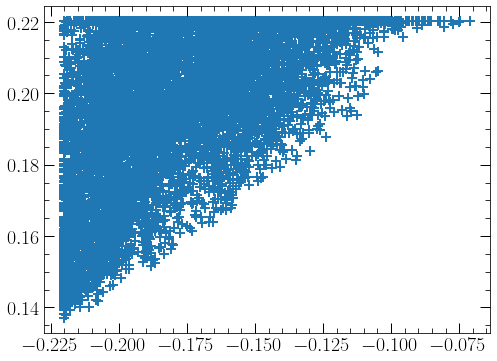

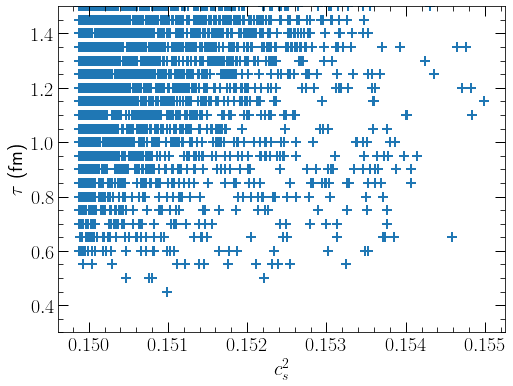

In [22]:
idx = ((n1 < 0) | (n2 < 0) | (n3 < 0) | (n4_1 < 0) | (n4_2 < 0) | (n4_3 < 0) | (n5 < 0) | (n6 < 0)) 

plt.figure()
plt.scatter(Pi[idx], sqrt(L1[idx]**2. + L2[idx]**2. + L3[idx]**2.), marker="+")

plt.figure()
plt.scatter(cs2[idx], tau[idx], marker="+")
plt.ylim([0.3, 1.5])
plt.xlabel(r"$c_s^2$")
plt.ylabel(r"$\tau$ (fm)")